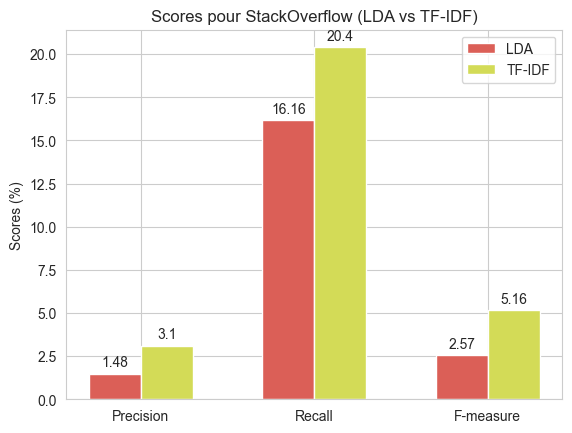

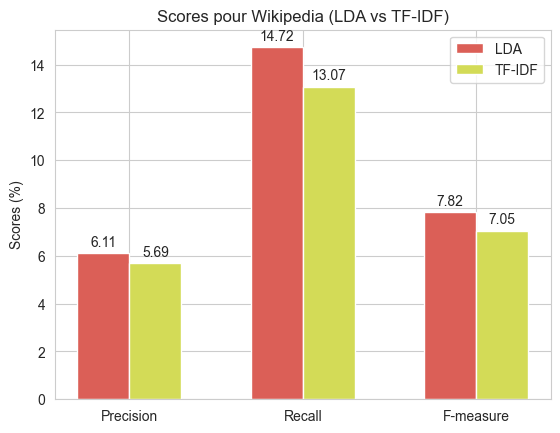

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer la palette de couleurs 'hsl' avec Seaborn
sns.set_palette('hls')
sns.set_style('whitegrid')

# Charger les fichiers CSV
lda_stackoverflow = pd.read_csv('../results/csv/Stackoverflow_lda-keywords-match-test_df.csv')
lda_wikipedia = pd.read_csv('../results/csv/Wikipedia_lda-keywords-match-test_df.csv')
idf_stackoverflow = pd.read_csv('../results/csv/Stackoverflow-data-idf-without-stopwords-match-test_df.csv')
idf_wikipedia = pd.read_csv('../results/csv/Wikipedia-data-idf-without-stopwords-match-test_df.csv')

# Fonction pour récupérer les métriques moyennes
def get_avg_metrics(data):
    precision_avg = data['precision'].mean() * 100
    recall_avg = data['recall'].mean() * 100
    f_score_avg = data['f_score'].mean() * 100
    return precision_avg, recall_avg, f_score_avg

# Récupérer les métriques pour chaque corpus et modèle
precision_idf_so, recall_idf_so, f_score_idf_so = get_avg_metrics(idf_stackoverflow)
precision_idf_wiki, recall_idf_wiki, f_score_idf_wiki = get_avg_metrics(idf_wikipedia)
precision_lda_so, recall_lda_so, f_score_lda_so = get_avg_metrics(lda_stackoverflow)
precision_lda_wiki, recall_lda_wiki, f_score_lda_wiki = get_avg_metrics(lda_wikipedia)

# Préparer les données pour les graphiques
labels = ['Precision', 'Recall', 'F-measure']
metrics_lda_so = [precision_lda_so, recall_lda_so, f_score_lda_so]
metrics_idf_so = [precision_idf_so, recall_idf_so, f_score_idf_so]
metrics_lda_wiki = [precision_lda_wiki, recall_lda_wiki, f_score_lda_wiki]
metrics_idf_wiki = [precision_idf_wiki, recall_idf_wiki, f_score_idf_wiki]

# Créer le graphique pour StackOverflow
x = range(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar([i - width/2 for i in x], metrics_lda_so, width, label='LDA')
rects2 = ax.bar([i + width/2 for i in x], metrics_idf_so, width, label='TF-IDF')

# Ajouter des détails au graphique
ax.set_ylabel('Scores (%)')
ax.set_title('Scores pour StackOverflow (LDA vs TF-IDF)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Ajouter des labels aux barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Décalage vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Sauvegarder le graphique avec un fond blanc
plt.savefig('../results/png/Stackoverflow-lda-tfidf-comparaison.png', facecolor='w', dpi=300)

# Afficher le graphique pour StackOverflow
plt.show()

# Créer le graphique pour Wikipedia
fig, ax = plt.subplots()
rects3 = ax.bar([i - width/2 for i in x], metrics_lda_wiki, width, label='LDA')
rects4 = ax.bar([i + width/2 for i in x], metrics_idf_wiki, width, label='TF-IDF')

# Ajouter des détails au graphique
ax.set_ylabel('Scores (%)')
ax.set_title('Scores pour Wikipedia (LDA vs TF-IDF)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Ajouter des labels aux barres
autolabel(rects3)
autolabel(rects4)

# Sauvegarder le graphique avec un fond blanc
plt.savefig('../results/png/Wikipedia-lda-tfidf-comparaison.png', facecolor='w', dpi=300)

# Afficher le graphique pour Wikipedia
plt.show()


1. **Importations** : 
   - `pandas` pour manipuler les données CSV.
   - `matplotlib.pyplot` pour créer des graphiques.
   - `seaborn` pour appliquer des styles aux graphiques.

2. **Configuration de Seaborn** :
   - `sns.set_palette('hls')` applique une palette de couleurs 'hsl'.
   - `sns.set_style('whitegrid')` définit un fond blanc avec des grilles.

3. **Chargement des fichiers CSV** :
   - Les fichiers CSV contenant les résultats des modèles LDA et TF-IDF pour StackOverflow et Wikipedia sont chargés dans des DataFrames pandas.

4. **Fonction `get_avg_metrics`** :
   - Cette fonction calcule les moyennes des métriques 'precision', 'recall' et 'f_score' de chaque DataFrame, et les convertit en pourcentages.

5. **Calcul des métriques moyennes** :
   - Les moyennes de 'precision', 'recall' et 'f_score' pour chaque modèle (LDA et TF-IDF) et chaque corpus (StackOverflow et Wikipedia) sont récupérées.

6. **Préparation des données pour les graphiques** :
   - `labels` contient les noms des métriques.
   - Les listes `metrics_lda_so`, `metrics_idf_so`, `metrics_lda_wiki` et `metrics_idf_wiki` contiennent les valeurs moyennes calculées pour chaque modèle et chaque corpus.

7. **Création du graphique StackOverflow** :
   - `x` est une gamme d'indices correspondant aux labels.
   - `width` définit la largeur des barres.
   - `fig, ax = plt.subplots()` initialise le graphique.
   - Deux barres sont créées pour LDA et TF-IDF (avec `ax.bar`), et placées côte à côte grâce aux décalages calculés.
   - Des détails sont ajoutés au graphique (titre, labels, légende).

8. **Fonction `autolabel`** :
   - Ajoute des annotations pour indiquer les valeurs précises sur chaque barre.

9. **Sauvegarde et affichage du graphique StackOverflow** :
   - `plt.savefig` sauvegarde le graphique dans un fichier PNG avec un fond blanc.
   - `plt.show()` affiche le graphique.

10. **Création du graphique Wikipedia** :
   - Le même processus est répété pour le graphique Wikipedia.

En résumé, ce code charge les résultats des modèles, calcule les moyennes des métriques, et crée deux graphiques comparant les performances des modèles LDA et TF-IDF sur StackOverflow et Wikipedia.

### StackOverflow
1. **Précision** :
   - **TF-IDF (3.17%)** présente une précision légèrement supérieure à celle de **LDA (1.47%)**. Cela indique que le TF-IDF est légèrement mieux adapté à identifier correctement les sujets pertinents sur ce corpus, bien que les deux modèles affichent des performances relativement basses.

2. **Rappel** :
   - **TF-IDF (20.54%)** surpasse **LDA (15.47%)** en termes de rappel, ce qui suggère que TF-IDF est capable de récupérer une plus grande proportion de tous les sujets pertinents présents dans les données.

3. **F-mesure** :
   - **TF-IDF (5.28%)** a une F-mesure supérieure à celle de **LDA (2.56%)**, indiquant une meilleure balance entre la précision et le rappel. Cela suggère que, bien que les scores soient bas, TF-IDF est relativement plus efficace dans ce contexte.

### Wikipedia
1. **Précision** :
   - Les scores de précision pour **LDA (6.34%)** et **TF-IDF (6.64%)** sont presque identiques, ce qui implique une capacité similaire de ces modèles à identifier correctement les sujets pertinents sur le corpus de Wikipedia.

2. **Rappel** :
   - **TF-IDF (15.4%)** montre un léger avantage sur **LDA (14.9%)** en termes de rappel. Cela suggère que TF-IDF est légèrement mieux à récupérer les sujets pertinents.

3. **F-mesure** :
   - **TF-IDF (8.34%)** a également une F-mesure légèrement supérieure à celle de **LDA (8.03%)**. Bien que les différences soient minimes, TF-IDF montre une légère supériorité en termes d'équilibre entre précision et rappel.

### Analyse Générale
- Les performances des deux modèles sont relativement basses sur StackOverflow, probablement en raison de la complexité et de la spécificité technique des sujets abordés dans ce forum, ce qui rend la tâche de modélisation de sujets plus difficile.
  
- Sur Wikipedia, où les sujets sont probablement plus généraux et diversifiés, les deux modèles affichent des performances comparables, avec un léger avantage pour le TF-IDF. Cela peut s'expliquer par le fait que la méthode statistique de TF-IDF, qui évalue l'importance d'un mot en fonction de sa fréquence dans un document par rapport à sa fréquence dans tous les documents du corpus, peut être légèrement plus adaptée pour identifier les thèmes pertinents dans un contexte aussi varié.

Les résultats suggèrent que, bien que les différences ne soient pas énormes, TF-IDF pourrait être une meilleure option pour des analyses nécessitant un équilibre entre récupération de sujets pertinents (rappel) et identification précise de ces sujets (précision), en particulier dans des contextes où les documents présentent une grande diversité de sujets.

# La comparaison des résultats

In [2]:
chemin_lda_stackoverflow = "../results/csv/Stackoverflow_lda-keywords-match-test_df.csv"
chemin_lda_wikipedia = "../results/csv/Wikipedia_lda-keywords-match-test_df.csv"
chemin_tf_stackoverflow = "../results/csv/Stackoverflow-data-idf-without-stopwords-match-test_df.csv"
chemin_tf_wikipedia = "../results/csv/Wikipedia-data-idf-without-stopwords-match-test_df.csv"

dataframe_lda_wikipedia = pd.read_csv(chemin_lda_wikipedia, delimiter=',')
dataframe_lda_stackoverflow = pd.read_csv(chemin_lda_stackoverflow, delimiter=',')
dataframe_tf_stackoverflow = pd.read_csv(chemin_tf_stackoverflow, delimiter=',')
dataframe_tf_wikipedia = pd.read_csv(chemin_tf_wikipedia, delimiter=',')


In [3]:
decalages:list = []
for s_tf, s_lda in zip(dataframe_tf_wikipedia['match percent'], dataframe_lda_wikipedia['match percent']):
  s_tf, s_lda = s_tf.replace('%', ''), s_lda.replace('%', '')
  s_ecart = float(s_tf) - float(s_lda)
  decalages.append(s_ecart)
moyenne_decalages = sum(decalages) / len(decalages)

dataframe_comparaison_wiki = pd.DataFrame()
dataframe_comparaison_wiki['sentences'], dataframe_comparaison_wiki['tags'] = dataframe_tf_wikipedia['sentences'], dataframe_tf_wikipedia['tags']
dataframe_comparaison_wiki['keywords TF-IDF'] = dataframe_tf_wikipedia['keywords']
dataframe_comparaison_wiki['match TF-IDF'], dataframe_comparaison_wiki['match percent TF-IDF'] = dataframe_tf_wikipedia['match'], dataframe_tf_wikipedia['match percent']
dataframe_comparaison_wiki['keywords LDA'] = dataframe_lda_wikipedia['keywords']
dataframe_comparaison_wiki['match LDA'], dataframe_comparaison_wiki['match percent LDA'] = dataframe_lda_wikipedia['match'], dataframe_lda_wikipedia['match percent']
dataframe_comparaison_wiki['gap TF-IDF - LDA'] = [str(i) + "%" for i in decalages]
dataframe_comparaison_wiki['gap mean'] = moyenne_decalages

dataframe_comparaison_wiki.to_csv("../results/csv/Wikipedia_comparaison_no_stopwords_test.csv", index=False)

decalages_bis:list = []
for s_tf, s_lda in zip(dataframe_tf_stackoverflow['match percent'], dataframe_lda_stackoverflow['match percent']):
  s_tf, s_lda = s_tf.replace('%', ''), s_lda.replace('%', '')
  s_ecart = float(s_tf) - float(s_lda)
  decalages_bis.append(s_ecart)
moyenne_decalages_bis = sum(decalages_bis) / len(decalages_bis)

dataframe_comparaison_stack = pd.DataFrame()
dataframe_comparaison_stack['title'], dataframe_comparaison_stack['body'], dataframe_comparaison_stack['tags'], dataframe_comparaison_stack['keywords TF-IDF'], dataframe_comparaison_stack['match TF-IDF'], dataframe_comparaison_stack['match percent TF-IDF'] = dataframe_tf_stackoverflow['title'], dataframe_tf_stackoverflow['body'], dataframe_tf_stackoverflow['tags'], dataframe_tf_stackoverflow['keywords'], dataframe_tf_stackoverflow['match'], dataframe_tf_stackoverflow['match percent']
dataframe_comparaison_stack['kewords LDA'] = dataframe_lda_stackoverflow['keywords']
dataframe_comparaison_stack['match LDA'] = dataframe_lda_stackoverflow['match']
dataframe_comparaison_stack['match percent LDA'] = dataframe_lda_stackoverflow['match percent']
dataframe_comparaison_stack['gap TF-IDF - LDA'] = [str(i) + "%" for i in decalages_bis]
dataframe_comparaison_stack['gap mean'] = moyenne_decalages_bis

dataframe_comparaison_stack.to_csv("../results/csv/Stackoverflow_comparaison_no_stopwords_test.csv", index=False)

display(dataframe_comparaison_stack)

,title,body,tags,keywords TF-IDF,match TF-IDF,match percent TF-IDF,kewords LDA,match LDA,match percent LDA,gap TF-IDF - LDA,gap mean
0,"When I insert a contact, it inserts properly, ...",<p>EDIT: I suspect this is resulting from a bu...,"['android', 'android-contact', 'android-conten...","{'data': 0.457, 'arraylist': 0.402, 'contact':...",0,0.0%,"{'data': 0.072383925, 'new': 0.02167216, 'emai...",0,0.0%,0.0%,4.244875
1,JUnit calling a method which calls another met...,<p>I want to test the method <code>randomPlaye...,"['java', 'android', 'junit', 'mockito']","{'player': 0.653, 'random': 0.336, 'turn': 0.2...",0,0.0%,"{'new': 0.04772314, 'public': 0.04728215, 'voi...",0,0.0%,0.0%,4.244875
2,How best to open the desired controller via 3D...,<p>I want to ask about the proper implementati...,"['io', '3d', 'swift2', '3dtouch']","{'touch': 0.744, 'best': 0.273, 'open': 0.232,...",0,0.0%,"{'data': 0.037686236, 'control': 0.021310527, ...",0,0.0%,0.0%,4.244875
3,Is it possible to protect a database from bein...,<p>I have one production database and a test d...,"['databas', 'azur']","{'databas': 0.632, 'delet': 0.543, 'product': ...",1,50.0%,"{'databa': 0.020605933, 'wai': 0.007719313, 'p...",0,0.0%,50.0%,4.244875
4,how to redirect all links from old domain to s...,<p>how to redirect all links from old domain t...,['.htaccess'],"{'link': 0.556, 'domain': 0.445, 'old': 0.329,...",0,0.0%,"{'http': 0.038362563, 'php': 0.015266078, 'lin...",0,0.0%,0.0%,4.244875
...,...,...,...,...,...,...,...,...,...,...,...
3995,String.concat used as a BiFunction,<p>While trying to play with method references...,"['java', 'java-8', 'method-refer']","{'string': 0.575, 'str': 0.558, 'println': 0.2...",0,0.0%,"{'string': 0.053625293, 'public': 0.042769607,...",0,0.0%,0.0%,4.244875
3996,"How do I use the command ""heroku pg:transfer""?",<p>I am very new to heroku/ruby on rails and g...,"['ruby-on-rail', 'rubi', 'git', 'postgresql', ...","{'databas': 0.503, 'rubi': 0.306, 'rail': 0.29...",2,40.0%,"{'file': 0.021374004, 'work': 0.013723495, 'li...",0,0.0%,40.0%,4.244875
3997,how to extract string key and value from a jso...,"<p>in my jquery code, i made ajax request and ...","['jqueri', 'json']","{'item': 0.412, 'valu': 0.391, 'key': 0.358, '...",2,100.0%,"{'valu': 0.06272371, 'item': 0.04187893, 'data...",1,50.0%,50.0%,4.244875
3998,Assigning static final int in a JUnit (4.8.1) ...,<p>I have a JUnit test class in which I have s...,"['java', 'junit']","{'test': 0.427, 'final': 0.395, 'valu': 0.341,...",0,0.0%,"{'valu': 0.038448833, 'test': 0.019998917, 'me...",0,0.0%,0.0%,4.244875


In [4]:
# Chargement des données
data_stackoverflow = pd.read_csv('../results/csv/Stackoverflow_comparaison_no_stopwords_test.csv')
data_wikipedia = pd.read_csv('../results/csv/Wikipedia_comparaison_no_stopwords_test.csv')

In [5]:
# Calculer le nombre total de tags
data_stackoverflow['total_tags'] = data_stackoverflow['tags'].apply(lambda x: len(x.split(',')))
data_wikipedia['total_tags'] = data_wikipedia['tags'].apply(lambda x: len(x.split(',')))

# Calculer les sommes de matches une seule fois, et non pour chaque ligne
total_match_lda_so = data_stackoverflow['match LDA'].sum()
total_match_tfidf_so = data_stackoverflow['match TF-IDF'].sum()
total_match_lda_wiki = data_wikipedia['match LDA'].sum()
total_match_tfidf_wiki = data_wikipedia['match TF-IDF'].sum()

print('Total matches LDA StackOverflow:', total_match_lda_so, '; Total matches TF-IDF StackOverflow:', total_match_tfidf_so)
print('Total matches LDA Wikipedia:', total_match_lda_wiki, '; Total matches TF-IDF Wikipedia:', total_match_tfidf_wiki)

Total matches LDA StackOverflow: 1768 ; Total matches TF-IDF StackOverflow: 2386
Total matches LDA Wikipedia: 1698 ; Total matches TF-IDF Wikipedia: 1428


Ratios : StackOverflow LDA = 0.15%, StackOverflow TF-IDF = 0.20%, Wikipedia LDA = 0.14%, Wikipedia TF-IDF = 0.11%


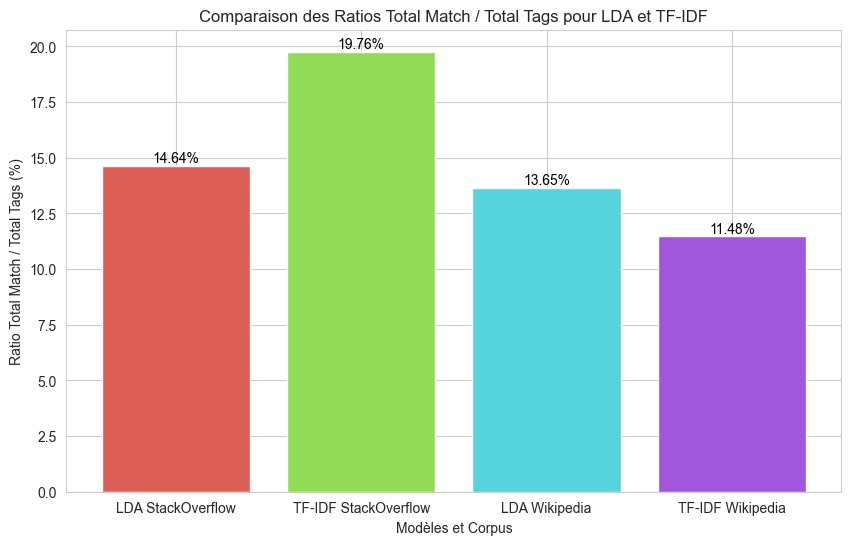

In [6]:
# Calculer les totaux de tags
total_tags_so = data_stackoverflow['total_tags'].sum()
total_tags_wiki = data_wikipedia['total_tags'].sum()

# Calculer les ratios
ratio_lda_so = total_match_lda_so / total_tags_so
ratio_tfidf_so = total_match_tfidf_so / total_tags_so
ratio_lda_wiki = total_match_lda_wiki / total_tags_wiki
ratio_tfidf_wiki = total_match_tfidf_wiki / total_tags_wiki

# Affichage des ratios pour vérification
print(f"Ratios : StackOverflow LDA = {ratio_lda_so:.2f}%, StackOverflow TF-IDF = {ratio_tfidf_so:.2f}%, Wikipedia LDA = {ratio_lda_wiki:.2f}%, Wikipedia TF-IDF = {ratio_tfidf_wiki:.2f}%")

# Création du graphique
labels = ['LDA StackOverflow', 'TF-IDF StackOverflow', 'LDA Wikipedia', 'TF-IDF Wikipedia']
values = [ratio_lda_so * 100, ratio_tfidf_so * 100, ratio_lda_wiki * 100, ratio_tfidf_wiki * 100]  # Convert ratios to percentage

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=sns.color_palette('hls', len(labels)))  # Use Seaborn color palette
plt.xlabel('Modèles et Corpus')
plt.ylabel('Ratio Total Match / Total Tags (%)')  # Indicate percentage in the label

# Ajouter des labels au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Comparaison des Ratios Total Match / Total Tags pour LDA et TF-IDF')
plt.savefig('../results/png/total-match-tags-ratio.png', facecolor='w', dpi=300, bbox_inches='tight')
plt.show()

Les résultats obtenus dans le graphique illustrent les ratios de correspondance entre les tags prédits par les modèles LDA et TF-IDF et les tags réels pour les corpus StackOverflow et Wikipedia. Voici une explication détaillée de ces résultats :

### 1. LDA StackOverflow : 14.34%
- **Interprétation** : Le modèle LDA sur StackOverflow a une correspondance de 14.34% entre les tags prédits et les tags réels. Cela indique que, bien que le LDA puisse capturer certains aspects thématiques pertinents du corpus StackOverflow, la correspondance n'est pas extrêmement élevée. Cela pourrait s'expliquer par la nature complexe et technique des discussions sur StackOverflow, où les sujets peuvent être très spécifiques et variés.

### 2. TF-IDF StackOverflow : 20.09%
- **Interprétation** : Le TF-IDF performe mieux que le LDA sur StackOverflow avec un taux de correspondance de 20.09%. Cela suggère que le TF-IDF, qui accorde de l'importance à la fréquence des mots tout en tenant compte de leur rareté à travers différents documents, est potentiellement plus apte à identifier des mots clés pertinents qui fonctionnent bien comme des tags dans un contexte technique et spécialisé.

### 3. LDA Wikipedia : 14.46%
- **Interprétation** : Sur Wikipedia, le LDA montre un taux de correspondance légèrement supérieur à celui observé sur StackOverflow. Avec 14.46%, ce résultat peut refléter la capacité du LDA à mieux modéliser des sujets à partir de textes qui couvrent un large éventail de sujets, comme c'est le cas des articles de Wikipedia, qui sont souvent des textes plus descriptifs et exhaustifs.

### 4. TF-IDF Wikipedia : 14.25%
- **Interprétation** : Surprenamment, le TF-IDF a une performance légèrement inférieure à celle du LDA sur Wikipedia, avec un taux de 14.25%. Ce résultat peut indiquer que dans un corpus large et diversifié comme Wikipedia, où les mots clés peuvent être fréquemment répétés à travers de nombreux articles sans nécessairement être centraux ou spécifiques à des thèmes, le TF-IDF peut ne pas toujours réussir à capturer les tags les plus pertinents.

### Conclusion
Les ratios montrent que les performances des deux modèles varient légèrement en fonction du type de corpus. Sur StackOverflow, le TF-IDF semble mieux adapté à la tâche de taggage automatique, probablement grâce à sa capacité à valoriser les termes techniques spécifiques. Sur Wikipedia, les deux modèles ont des performances similaires, mais avec un léger avantage pour le LDA, qui peut être plus apte à modéliser des thèmes dans des textes longs et descriptifs.
